In [16]:
import sqlite3
import pandas as pd
import sqlalchemy
import numpy as np
import scipy
from scipy import stats

# Valores estadísticos de un muestreo


Vamos a realizar un muestreo sobre datos de fútbol. He intentado conseguir una base de datos real de algún equipo que trabaje

con Big Data, como el Manchester City, pero la mayoría de información en internet es de pago, así que he usado la base

de datos más grande que he encontrado, que aunque es interesante, es la base de datos de un  videojuego muy conocido, 

pero servirá para ilustrar un muestreo. 

**Nota: Presento conjuntamente los ejercicios de Nivel 1 de los Sprint 5 y 6 ya que en el Sprint 5 cometí un error. ** 
    
**Reutilicé código del mismo ejercicio, para dar el valor a dos variables que eran importantes para encontrar el tamaño de la** 

**muestra.** 

In [2]:
con= sqlite3.connect("database.sqlite")# importamos la base de datos. 


df = pd.read_sql_query( "SELECT * from Player_Attributes", con)
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [3]:
df.columns# miramos las columnas

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [4]:
df.shape # dimensiones 

(183978, 42)

In [5]:
# Para ilustrar dos técnicas de muestreo aleatorias, sistemática y simple, vamos a quedarnos con tan sólo tres variables, 
# una categórica, y dos numéricas: 
# preferred_foot, agility, crossing.


dff= df [["preferred_foot", "agility", "crossing"]]



 Nuestro punto de partida será un __*muestreo piloto*__ lo suficientemente amplío para calcular la desviación estandar de cada 
variable numéricas, así como los porcentajes de la categórica. Supondremos que la única información de la que dispondremos será la población total, N = len (dff), por lo que **vamos a ignorar toda la información del data set que no obtengamos de las muestras, salvo N**
 
 Una vez, estimdas las dos desviaciones, y los porcentajes de la variable categórica, las usaremos como información pasada, para estimar el tamaño de la muestra, **n**. Por cada variable habrá un número de muestra mínimo dentro de un coeficiente de confianza, inventado, y un error relativo máximo. Para ello sacaremos el cáclulo del Estimador insesgado de la Media de la muestra, y de la proporción de clase. 
 
 Teorías explicadas y demostradas en los siguientes enlaces. 
 http://matematicas.unex.es/~inmatorres/teaching/muestreo/assets/Cap1.pdf
 http://matematicas.unex.es/~inmatorres/teaching/muestreo/assets/Cap_3.pdf
 http://matematicas.unex.es/~inmatorres/teaching/muestreo/assets/cap_5.pdf
 
 Llegando a dos fórmulas. 
 


* \begin{aligned}\cdot \\ n=\dfrac{NZ^{2}\sigma ^{2}}{\left( N-1\right)  E^{2}+z^{2}\sigma ^{2}}\end{aligned}


* \begin{aligned}\cdot \\  n=\dfrac{Z^{2}Npq}{\left( N-1\right) e^{2}+Z^{2}pq}\end{aligned}

In [6]:
# Primero de todo escogemos una muestra aleatoria simple, que nos servirá para obtener ciertos parámetros para luego usar como
# referencia bibliográfica

piloto = dff.sample(n = 300)

piloto.head()


,preferred_foot,agility,crossing
112646,left,83.0,68.0
32835,left,77.0,72.0
82619,right,67.0,55.0
112330,right,60.0,22.0
7025,right,71.0,58.0


* Ejércicio . Calcularemos las Mediana, la Moda , la media, la desviación estándar y así como el coeficiente de correlación



In [53]:
# Primero definiremos las funciones que calculen cada una de ellas. 

N = len (dff)

# primero calcularemos la mediana, la moda y la  media de las dos variables cuantificables. "agility" y "crossing", 

agi= piloto ["agility"]
cro= piloto ["crossing"]
# limpiamos todos los valores nulos. 
agi=agi.dropna()
cro=cro.dropna()

# luego los pasamos a matrices, para uso posterior
agi_mat= agi.to_numpy()
cro_mat= cro.to_numpy()


def mediana (z):# ha de ser un df de una sola columna 
    z= z.to_numpy()
    y =z.T
    x=np.sort(y)
   
    if len(x )%2 != 0:
        return x[len(x)//2+1]
    else : 
        return (x[len(x)//2]+ x[(len(x)//2)+1])/2
    
def moda (x):# x ha de ser un dataframe de una sola columna
    y1= x.value_counts()

    return y1[y1==y1.max()].index.to_list()

def media (x): # x ha de ser un dataframe de una sola columna
        y= x.to_numpy()
        z= y.T
        w= np.nansum(z)
        return w/len(z)
    
     
agimdna= mediana(agi)
cromdna= mediana(cro)
agimod= moda(agi)
cromod=moda(cro)
agimed= media(agi)
cromed=media(cro)



print ("La variable {} tiene una Mediana de {}, una moda de {} y un valor medio de  {:.2f}".format("agility",
                        agimdna,agimod[0],agimed) ) 

print ("La variable {} tiene una Mediana de {}, una moda de {} y un valor medio de  {:.2f}".format("crossing",
                        cromdna,cromod[0],cromed))



La variable agility tiene una Mediana de 68.0, una moda de 74.0 y un valor medio de  66.10
La variable crossing tiene una Mediana de 60.0, una moda de 64.0 y un valor medio de  56.68


In [54]:
s1= np.std(agi_mat)# desviación para la variable agility
s2= np.std(cro_mat) # desviación para crossing. 
piloto.describe() # sacamos información estadística sobre la prueba piloto. Y de ahí sacamos la desviación de ambas 
# variables cuantificables. 
print ( " la desviación estándar de {} es {:.2f}".format("agility", s1))
print ( " la desviación estándar de {} es {:.2f}".format("crossing", s2))



 la desviación estándar de agility es 13.14
 la desviación estándar de crossing es 16.81


<AxesSubplot:title={'center':'frecuencia de agilidad'}, ylabel='Frequency'>

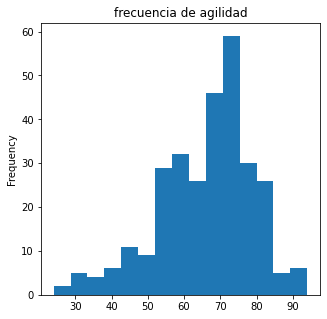

In [77]:
import matplotlib.pyplot as plt
piloto["agility"].plot (kind = "hist", bins = 15 ,  title ="frecuencia de agilidad"
                        , figsize= (5,5))

# Hacemos una observación gráfica de las dos variables, y podemos ver que tiene una cierta tendencia a una normal. 
# al ser la media una variable aleatoriam( ya que depende del tamaño de la muestrta y de los elementos seleccionados u(i)), 
# para n tendiendo a infinito, tiende a una normal( Teorema del límite Central)



<AxesSubplot:title={'center':'frecuencia del cruce'}, ylabel='Frequency'>

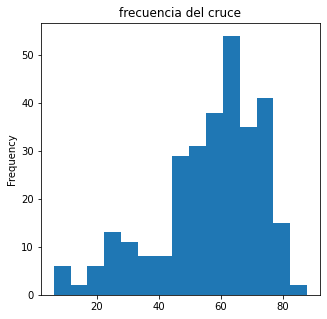

In [78]:
piloto["crossing"].plot (kind = "hist", bins = 15,  title ="frecuencia del cruce"
                        , figsize= (5,5))

In [57]:
# por últimos nos falta anailzar los valores de la variable preferred_foot
pil = piloto["preferred_foot"].value_counts()
pil

right    224
left      75
Name: preferred_foot, dtype: int64

In [105]:
pil0= pil.to_numpy()# PARTE CORREGIDA-

p= pil0[0]/len(piloto)
q = 1-p
print (round(p,2))

0.75


In [130]:
dfcorr0= piloto[["agility", "crossing"]]
corr0=dfcorr0.dropna()
x0= corr0["agility"]
y0= corr0["crossing"]
r0=np.corrcoef(x0,y0)
print (" el coeficicente de correlación entre agility y crossing, es   : \n",r0[0][1] )

 el coeficicente de correlación entre agility y crossing, es   : 
 0.5298131605817211


<AxesSubplot:xlabel='agility', ylabel='crossing'>

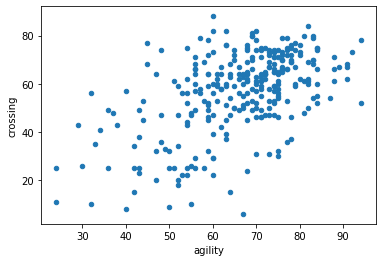

In [136]:
# Por lo que son dos variables poco correlacionadas.  Tienen una dependencia baja 
corr0.plot(x= "agility", y="crossing" , kind="scatter")


In [97]:
# definimos n1,n2,n3 como los tamaños de la muestra mínimos, pata un coeficiente de confianza del 70 % con un margen de error 
# relativo del 10 %, tanto si tienen una tendencia normal o no, podemos usar el cuantil de la media Z( vía normal o desigualdad de
# Chebyshev si no cumple con una tendencia a la media). Esto nos dice que para un tamaño n de una muestra, hay un 70% de que 
# las propiedades de la población total, se encuentren representadas en la muestra 
# Z para una confianza del 70 % es de 0,53, y el error relativo E = 0.1
E= 0.1
Z= 0.53
N = len (dff)
# sumando al resto de variables para calcular el tamaño de la muestra , N, D1, D2,p, q
# repasando la fórmula de la extracción del tamaño de la muestra .

* \begin{aligned}\cdot \\ n=\dfrac{NZ^{2}\sigma ^{2}}{\left( N-1\right)  E^{2}+z^{2}\sigma ^{2}}\end{aligned}


* \begin{aligned}\cdot \\  n=\dfrac{Z^{2}Npq}{\left( N-1\right) e^{2}+Z^{2}pq}\end{aligned}

In [98]:
n1= (N* (Z**2) * (s1**2))/ ( (N-1)*(E**2) + (s1**2)* (Z**2)    )
n2= (N* (Z**2) * (s2**2))/ ( (N-1)*(E**2) + (s2**2)* (Z**2) )
n3= (N* (Z**2) * (p*q))/ ( (N-1)*(E**2) + (p*q)* (Z**2)   )


print (n1,n2,n3)


     

4725.184015504919 7611.9459843068935 5.313254985849234


In [63]:
# viendo que el resultado más grande es n2, tomaremos n2 para el tamaño de la muestra
n2= int(round(n2,0))
print (round((n2/N *100),2), "%") # el procentaje de la muestra respecto al total.

4.14 %


In [81]:
# Así que el muestreo aleatoria simple es 
df1 = dff.sample(n = n2)

df1.head()

,preferred_foot,agility,crossing
123529,right,65.0,53.0
32602,right,75.0,60.0
152621,right,73.0,69.0
41835,right,86.0,68.0
12730,right,56.0,16.0


In [93]:
# pasamos a mirar los resultados de su variables 
agi1= df1 ["agility"]
cro1= df1 ["crossing"]
# limpiamos todos los valores nulos. 
agi1=agi1.dropna()
cro1=cro1.dropna()


agi_mat1= agi1.to_numpy()
cro_mat1= cro1.to_numpy()



     
agimdna1= mediana(agi1)
cromdna1= mediana(cro1)
agimod1= moda(agi1)
cromod1=moda(cro1)
agimed1= media(agi1)
cromed1=media(cro1)



print ("La variable {} tiene una Mediana de {}, una moda de {} y un valor medio de  {:.2f}".format("agility",
                        agimdna1,agimod1[0],agimed1) ) 

print ("La variable {} tiene una Mediana de {}, una moda de {} y un valor medio de  {:.2f}".format("crossing",
                        cromdna1,cromod1[0],cromed1))




La variable agility tiene una Mediana de 68.0, una moda de 72.0 y un valor medio de  65.92
La variable crossing tiene una Mediana de 59.0, una moda de 68.0 y un valor medio de  55.40


In [86]:
s11= np.std(agi_mat1)# desviación para la variable agility
s21= np.std(cro_mat1) # desviación para crossing. 
piloto.describe() # sacamos información estadística sobre la prueba piloto. Y de ahí sacamos la desviación de ambas 
# variables cuantificables. 
print ( " la desviación estándar de {} es {:.2f}".format("agility", s11))
print ( " la desviación estándar de {} es {:.2f}".format("crossing", s21))

 la desviación estándar de agility es 12.81
 la desviación estándar de crossing es 17.06


In [99]:
pil1=df1["preferred_foot"].value_counts()# para mirar el porcentajes de diestros o zurdos, 
pil1

right    5767
left     1818
Name: preferred_foot, dtype: int64

In [106]:
pil11= pil1.to_numpy()# PARTE CORREGIDA-

p1= pil11[0]/len(df1)
q1 = 1-p1
print (round(p1,2), " es el valor de p para la muestra,  lo comparamos con p de la piloto que es  :" , round(p,2))

0.76  es el valor de p para la muestra,  lo comparamos con p de la piloto que es  : 0.75


<AxesSubplot:title={'center':'frecuencia de agilidad'}, ylabel='Frequency'>

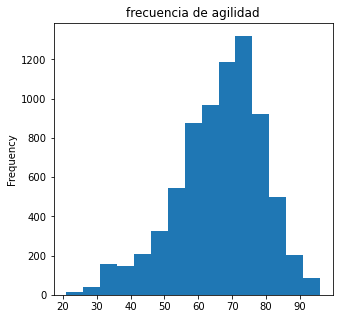

In [89]:
# si miramos los gráficos , podremos ver cierto parecido con el piloto
df1["agility"].plot (kind = "hist", bins = 15, title ="frecuencia de agilidad"
                        , figsize= (5,5))

<AxesSubplot:title={'center':'frecuencia del cruce'}, ylabel='Frequency'>

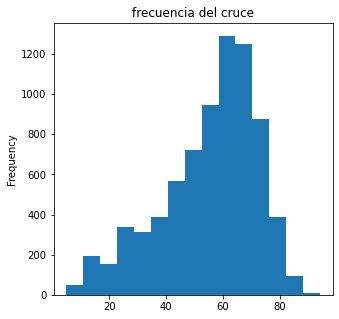

In [90]:
df1["crossing"].plot (kind = "hist", bins = 15,  title ="frecuencia del cruce"
                        , figsize= (5,5))

In [131]:
 dfcorr1= df1[["agility", "crossing"]]
corr1=dfcorr1.dropna()
x1= corr1["agility"]
y1= corr1["crossing"]
r1=np.corrcoef(x1,y1)
print (" el coeficicente de correlación entre agility y crossing, es   : \n",r1[0][1] )

 el coeficicente de correlación entre agility y crossing, es   : 
 0.6014681657546206


<AxesSubplot:xlabel='agility', ylabel='crossing'>

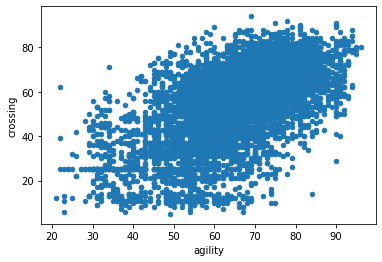

In [137]:
# Por lo que son dos variables poco correlacionadas.  Tienen una dependencia baja, baja correlación 
corr1.plot(x= "agility", y="crossing" , kind="scatter")

In [91]:
# para hacer el nuestreo sistemático, partiremos de un valor u(i), y  a partir de ahí, iremos añadiendo un elemento 
# a la muestra cada k índices, dónde k = N/ n2, 
k =round( N/ n2,3)
# el primer número elegido u0, lo seleccionamos tal que u0 <= k
print (k)

24.169


In [92]:
import math
k= math.ceil(k)
# escogemos un número al azar entre los primeros k 
u0 = np.random.randint(1, k)
# y seleccionamos del data set , aquellos u(0 +k), u(0+2k), u(0+3k),.... u0+ (n2-1)k
df2 = dff [u0 : N : k]
df2


,preferred_foot,agility,crossing
22,left,81.0,77.0
47,right,81.0,73.0
72,right,63.0,56.0
97,right,49.0,45.0
122,left,79.0,77.0
...,...,...,...
183872,left,85.0,70.0
183897,left,70.0,65.0
183922,left,43.0,45.0
183947,left,62.0,73.0


In [94]:
#describimos las dos variables 

# pasamos a mirar los resultados de su variables 
agi2= df2 ["agility"]
cro2= df2 ["crossing"]
# limpiamos todos los valores nulos. 
agi2=agi2.dropna()
cro2=cro2.dropna()


agi_mat2= agi2.to_numpy()
cro_mat2= cro2.to_numpy()



     
agimdna2= mediana(agi2)
cromdna2= mediana(cro2)
agimod2= moda(agi2)
cromod2=moda(cro2)
agimed2= media(agi2)
cromed2=media(cro2)



print ("La variable {} tiene una Mediana de {}, una moda de {} y un valor medio de  {:.2f}".format("agility",
                        agimdna2,agimod2[0],agimed2) ) 

print ("La variable {} tiene una Mediana de {}, una moda de {} y un valor medio de  {:.2f}".format("crossing",
                        cromdna2,cromod2[0],cromed2))


La variable agility tiene una Mediana de 68.0, una moda de 72.0 y un valor medio de  66.12
La variable crossing tiene una Mediana de 59.0, una moda de 62.0 y un valor medio de  55.11


In [104]:
pil2=df2["preferred_foot"].value_counts()# para mirar el porcentajes de diestros o zurdos, 
pil2

right    5572
left     1756
Name: preferred_foot, dtype: int64

In [107]:
pil21= pil2.to_numpy()# PARTE CORREGIDA-

p2= pil21[0]/len(df1)
q2 = 1-p2
print (round(p2,2), " es el valor de p para la muestra,  lo comparamos con p de la piloto que es  :" , round(p,2)) 

0.73  es el valor de p para la muestra,  lo comparamos con p de la piloto que es  : 0.75


<AxesSubplot:ylabel='Frequency'>

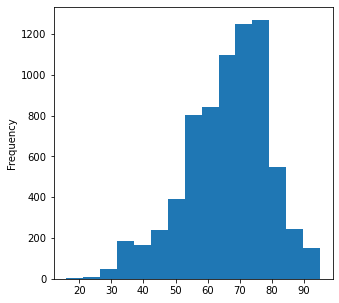

In [108]:
df2["agility"].plot (kind = "hist", bins = 15
                        , figsize= (5,5))

<AxesSubplot:ylabel='Frequency'>

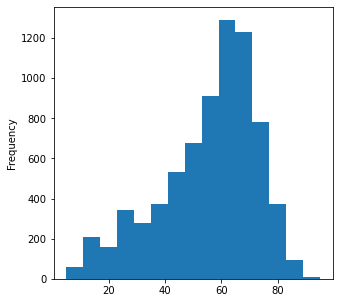

In [109]:
df2["crossing"].plot (kind = "hist", bins = 15
                        , figsize= (5,5)) # dónde en ambas gráficas podemos observar la misma tendencia que el muestreo simple
# y la prueba piloto. 


In [132]:
 dfcorr2= df2[["agility", "crossing"]]
corr2=dfcorr2.dropna()
x2= corr2["agility"]
y2= corr2["crossing"]
r2=np.corrcoef(x2,y2)
print (" el coeficicente de correlación entre agility y crossing, es   : \n",r2[0][1] )

 el coeficicente de correlación entre agility y crossing, es   : 
 0.6027170344367029


<AxesSubplot:xlabel='agility', ylabel='crossing'>

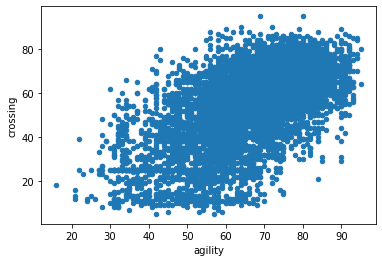

In [138]:
# Por lo que son dos variables poco correlacionadas.  Tienen una dependencia baja, baja correlación 
corr2.plot(x= "agility", y="crossing" , kind="scatter")